In [1]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [2]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

In [3]:
print(x.shape, '\n', y.shape)

(1000, 10) 
 (1000,)


In [4]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

In [6]:
model = DecisionTreeClassifier()

In [7]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

In [8]:
pl = Pipeline(steps=[('fs',rfe),('m',model)])

In [9]:
n_scores = cross_val_score(pl, x, y, scoring='accuracy', cv=cv)

In [10]:
print('Cross-Validation Accuracy: %.2f (%.2f)' % (np.mean(n_scores), np.std(n_scores)))

Cross-Validation Accuracy: 0.87 (0.02)


In [12]:
pl.fit(x, y)

Pipeline(steps=[('fs',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('m', DecisionTreeClassifier())])

In [13]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
       False])

In [14]:
rfe.ranking_

array([5, 1, 2, 1, 1, 1, 4, 1, 6, 3])

In [15]:
from sklearn.feature_selection import RFECV

In [23]:
rfecv = RFECV(estimator=DecisionTreeClassifier())

In [24]:
pl = Pipeline(steps=[('fs',rfecv),('m',model)])

In [25]:
n_scores = cross_val_score(pl, x, y, scoring='accuracy', cv=cv)

In [26]:
print('Cross-Validation Accuracy: %.2f (%.2f)' % (np.mean(n_scores), np.std(n_scores)))

Cross-Validation Accuracy: 0.89 (0.02)


In [27]:
pl.fit(x, y)

Pipeline(steps=[('fs', RFECV(estimator=DecisionTreeClassifier())),
                ('m', DecisionTreeClassifier())])

In [28]:
rfecv.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 4, 3])

In [29]:
rfecv.n_features_

7

In [41]:
rfecv.grid_scores_

array([0.758, 0.845, 0.852, 0.866, 0.874, 0.882, 0.886, 0.879, 0.885,
       0.886])

In [45]:
import seaborn as sns
import pandas as pd

In [62]:
grid_df = pd.DataFrame({'Score': rfecv.grid_scores_, 'n_features': np.arange(1, len(rfecv.grid_scores_) + 1, dtype = int)})

<AxesSubplot:xlabel='n_features', ylabel='Score'>

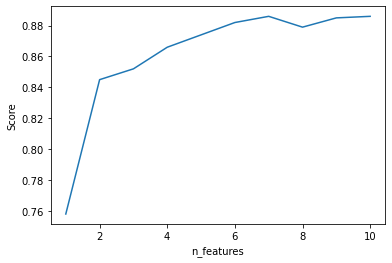

In [64]:
sns.lineplot(data=grid_df, x="n_features", y="Score")